# 프로젝트 #2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

**▷▶ 필요한 패키지 import하기**


In [1]:
import numpy as np               # numpy 불러오기
import pandas as pd              # pandas 불러오기
import matplotlib.pyplot as plt  # 데이터 시각화 라이브러리
import seaborn as sns            # 데이터 시각화 라이브러리

from sklearn.model_selection import train_test_split  # model_selection 모듈 안의 Train / Test Set을 나누기 위한 함수 불러오기
from sklearn.metrics import classification_report  # metrics 모듈 안의 학습 모델을 평가하기 위한 함수 불러오기
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


<br>

### (1) 데이터 가져오기
---
- 터미널에서 `~/data/data/bike-sharing-demand` 경로에 `train.csv` 데이터를 train 변수로 가져오자


- `pd.read_csv()` 매서드를 통해 `train.csv` 파일을 가져올 수 있으며, train 변수에 DataFrame 자료형으로 저장된다


In [2]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

- train 변수는 원본데이터로 유지하고 df 변수에 copy 한다.


- 새로 설정한 `df` 변수 또한 `DataFrame` 자료형이다.


- `df`는 Dictionary와 비슷한 구조를 가지며 총 12개의 정보를 가지고 있다.

In [3]:
df = train.copy()
print(type(df))
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


<br>

**▽ 아래는 df 내에 있는 data들의 정보이다. 각각의 Data들의 의미를 살펴보자**

**Data Fields** <br>

- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1:Clear, Few clouds, Partly cloudy, Partly cloudy<br>2:Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - 'feels like' temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

<br>

### (2) `datetime` 컬럼을 `datetime` 자료형으로 변환하고 <br><br><U>연, 월, 일, 시, 분, 초</U>까지 6가지 컬럼 생성하기
---




- **`to_datetime()`** 함수를 사용해서 기존에 자료형이 **`object`**였던 **`datetime`**을 **`datetime64[ns]`**으로 변환해보자


- 데이터 내에 범주형 데이터는 존재하지 않으므로 `one-hot Encoding`처럼 수치형 데이터로 변환하는 작업은 여기서는 생략해도 됨

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


<br>

**`df.['datetime'].dt.year`** 수식을 적용하여 <U>**년, 월, 일, 시, 분, 초**</U>를 분류해보자<br>
- 6개의 (<U>**년, 월, 일, 시, 분, 초**</U>) 데이터를 `df`의 `column`에 추가해보자

In [5]:
tt = train.copy()
tt['datetime']=tt.datetime.apply(pd.to_datetime)
print((tt['datetime']))

tt['year'] = tt.datetime.apply(lambda x:x.year)

tt.head()

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [6]:
df['year'] = df['datetime'].dt.year 
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [8]:
df.keys()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

<br>

### (3) `year`, `month`, `day`, `hour`, `minute`, `second`  데이터 개수 시각화하기<br>
---

- `year`, `month`, `day`, `hour`, `minute`, `second` 데이터 시각화에 앞서 각 특성값 별 중복되지 않는 고유값이 몇개씩 있는지 확인해보자

In [9]:
print('year value counts =', len(df['year'].value_counts()))
print('month value counts =',len(df['month'].value_counts()))
print('day value counts =',len(df['day'].value_counts()))
print('hour value counts =',len(df['hour'].value_counts()))
print('minute value counts =',len(df['minute'].value_counts()))
print('second value counts =',len(df['second'].value_counts()))

year value counts = 2
month value counts = 12
day value counts = 19
hour value counts = 24
minute value counts = 1
second value counts = 1



- 데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

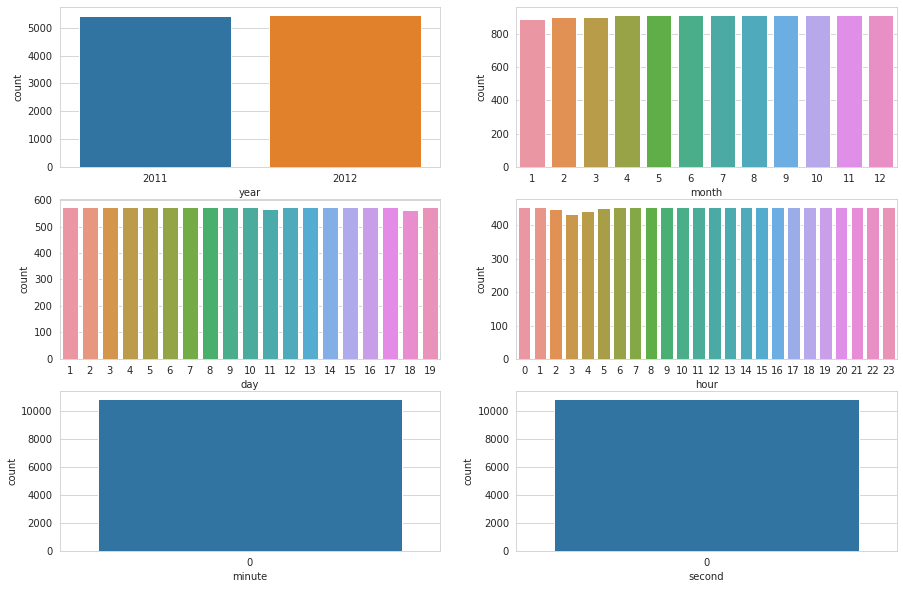

In [10]:
fig = plt.figure(figsize=(15,10))

# 차트 배경 설정
sns.set_style('whitegrid')

ax1 = fig.add_subplot(3,2,1)
sns.countplot(x='year', data = df)

ax2 = fig.add_subplot(3,2,2)
sns.countplot(x='month', data = df)

ax3 = fig.add_subplot(3,2,3)
sns.countplot(x='day', data = df)

ax4 = fig.add_subplot(3,2,4)
sns.countplot(x='hour', data = df)

ax5 = fig.add_subplot(3,2,5)
sns.countplot(x='minute', data = df)

ax6 = fig.add_subplot(3,2,6)
sns.countplot(x='second', data = df)


# # 차트 세로로 그리기
# sns.countplot

<br>

### (4) `X`, `y` 컬럼 선택 및 train/test 데이터 분리
---
- data들의 정보를 `describe()` 매서드를 사용하여 살펴보자

In [11]:
print(df.shape)
df.describe()

(10886, 18)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


<br>

- 사용가능한 data를 선별하여 X 변수에 저장해보자<br>
    - `minute`과 `second` 데이터는 값이 한개만 존재하므로(value_count 개수가 한개씩) 빼도록 한다. <br>
    - `casual`과 `registered` 데이터도 누락한다.
    - target 값에 들어갈 `count` 열도 누락한다.
    

In [12]:
drop_columns = ['datetime', 'minute', 'second', 'casual', 'registered', 'count']
selected_columns = list(df.drop(drop_columns, axis=1, inplace=False).columns)
print(drop_columns); print(selected_columns)

['datetime', 'minute', 'second', 'casual', 'registered', 'count']
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']


In [13]:
# 사용가능한 특성값을 X 변수에 저장
# y에는 target값인 count를 대입

X = df.drop(drop_columns, axis=1, inplace=False).values
y = df[['count']].values

In [14]:
print(X.shape); print(y.shape)

(10886, 12)
(10886, 1)


In [15]:
df['count'].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

<br>

### (5) LinearRegression 모델 학습
---

#### 1) 학습 및 테스트 데이터 분리를 위해 `sklearn.model_selection` 모듈을 불러온다.
- train_test_split() 함수 사용

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708, 1)
(2178, 12) (2178, 1)


#### 2) sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

<br>

### (6) 학습된 모델로 `X_test`에 대한 예측값 출력 및 손실함수 값 계산
---

#### 1)  학습된 모델에 `X_test`를 입력해서 예측값 출력하기

In [19]:
predictions = model.predict(X_test)
predictions

array([[248.10627003],
       [ 48.79765547],
       [200.90676727],
       ...,
       [309.7528022 ],
       [ 38.17030198],
       [243.62697388]])

#### 2) 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse / rmse 
    
    
**sklearn.metrics 모듈에 RMSE는 따로 없기 때문에 MSE에서 제곱근을 취해서 값을 출력한다.**

In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
#rmse = mse**0.5

print('Mean Squared Error = ', mse); print('Root Mean Squared Error = ', rmse)

Mean Squared Error =  19945.37005375412
Root Mean Squared Error =  141.22807813517156


<br>

### (7) x축 `temp` 또는 `humidity`,  y축 `count`로 예측 결과 시각화 하기
---

#### 1) ndarray 타입의 X_test를 pandas DataFrame을 사용하여 X_test_df에 새로 설정

In [21]:
X_test_df = pd.DataFrame(X_test, columns = selected_columns)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test
X_test_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,3.0,0.0,1.0,1.0,33.62,40.150,59.0,0.0000,2011.0,7.0,19.0,11.0,248.106270,127
1,1.0,1.0,0.0,1.0,4.10,6.820,54.0,6.0032,2012.0,1.0,16.0,6.0,48.797655,13
2,4.0,0.0,0.0,1.0,9.84,11.365,48.0,12.9980,2011.0,12.0,11.0,18.0,200.906767,163
3,3.0,0.0,1.0,2.0,29.52,34.090,62.0,12.9980,2012.0,8.0,15.0,10.0,292.785832,233
4,2.0,0.0,1.0,1.0,25.42,31.060,53.0,16.9979,2012.0,6.0,15.0,23.0,388.486548,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2.0,0.0,0.0,3.0,23.78,27.275,49.0,19.0012,2011.0,5.0,8.0,17.0,224.130198,351
2174,1.0,0.0,1.0,3.0,13.12,15.150,66.0,22.0028,2012.0,1.0,17.0,4.0,68.593142,2
2175,4.0,0.0,0.0,1.0,16.40,20.455,40.0,12.9980,2012.0,11.0,4.0,14.0,309.752802,509
2176,1.0,0.0,0.0,1.0,11.48,14.395,81.0,7.0015,2012.0,1.0,1.0,5.0,38.170302,5


<br>

#### 2) x축에  `temp` 또는 `humidity` 데이터를, y축에는 count 데이터를 넣어서 시각화하기
<br>

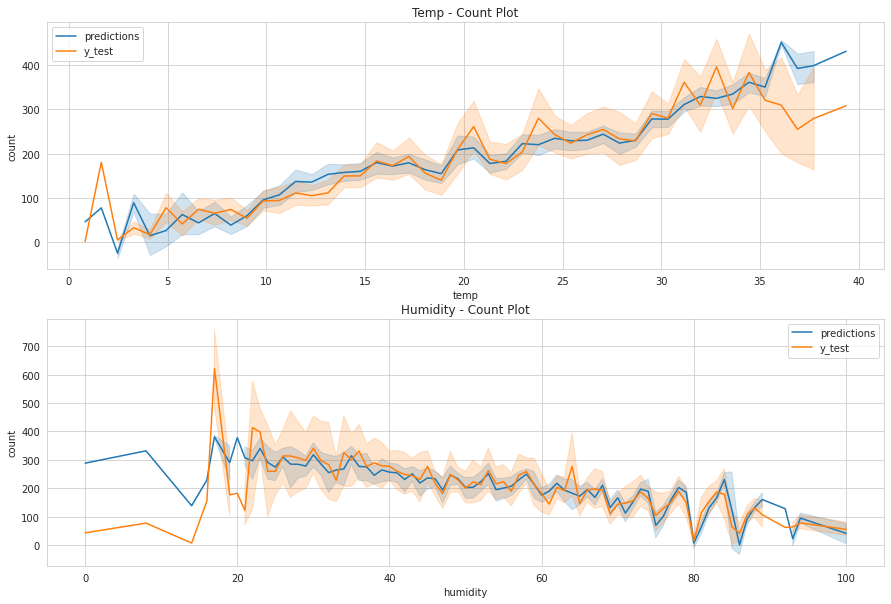

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'], label='predictions')
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'], label='y_test')
plt.title('Temp - Count Plot')
plt.ylabel('count')

plt.subplot(212)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'], label='predictions')
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'], label='y_test')
plt.title('Humidity - Count Plot')
plt.ylabel('count')

plt.show()


### (8) 결론
---

- `프로젝트(2) : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇명?`에서는 kaggle 경진대회에서 제공하는 데이터 셋을 활용하여 시간, 온도, 습도, 계절 등의 정보가 담긴 12가지의 특성값을 가지고 자전거의 대여량을 예측하는 문제다.<br><br>특성값들 중에는 시간, 요일, 계절, 습도 등 자전거 대여량을 졀정하는 데 중요한 데이터가 있는가 반면에 불필요한 데이터(`casual`, `registered`) 또한 존재한다.<br><br>Kaggle 페이지에서 각 feature들의 정보를 확인하고 정형화된 데이터를 분석하기 위해 pandas DataFrame 모듈을 활용하였다. datetime 칼럼의 자료형이 object 자료형으로 되어있었고 회귀 문제를 풀기위해 수치형 데이터로 변환이 필요했다. `to_datetime` 매서드를 사용하여 자료형을 datetime으로 변환하고 이른 `년`, `월`, `일`, `시`, `분`, `초` 단위로 쪼개서 저장하였다.<br><br>불필요한 데이터(열)를 삭제하고 X 및 y 변수에 data와 target을 재설정하였다.<br><br>모델을 학습하기 위해 `sklearn`의 `LinearRegression` 모델을 불러왔고 학습하였다. 또한 학습모델에 대한 평가를 진행하기 위해 `skearn`의 `Mean Squared Error` 매서드를 사용하여 모델을 검증하였고 시각화를 통해 회귀 모델의 성능을 확인할 수 있었다.

<br><img src="https://user-images.githubusercontent.com/103712369/166401810-a3cd8b64-33c2-4844-a958-6a707b8a1e2c.png" width='500'/><br><br>루브릭 평가항목인 RMSE값은 141.2로 기준을 만족하였다.
